In [1]:
# Carregando as bibliotecas
library(mlbench)
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [8]:
# Acessando os dados
data(PimaIndiansDiabetes)
head(PimaIndiansDiabetes)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,0,0,25.6,0.201,30,neg


In [11]:
# Garantindo o mesmo resultado através do mesmo seed 
set.seed(7)

# calculate correlation matrix
correlationMatrix <- cor(PimaIndiansDiabetes[ ,1:8])

In [12]:
# summarize the correlation matrix
print(correlationMatrix)

            pregnant    glucose   pressure     triceps     insulin       mass
pregnant  1.00000000 0.12945867 0.14128198 -0.08167177 -0.07353461 0.01768309
glucose   0.12945867 1.00000000 0.15258959  0.05732789  0.33135711 0.22107107
pressure  0.14128198 0.15258959 1.00000000  0.20737054  0.08893338 0.28180529
triceps  -0.08167177 0.05732789 0.20737054  1.00000000  0.43678257 0.39257320
insulin  -0.07353461 0.33135711 0.08893338  0.43678257  1.00000000 0.19785906
mass      0.01768309 0.22107107 0.28180529  0.39257320  0.19785906 1.00000000
pedigree -0.03352267 0.13733730 0.04126495  0.18392757  0.18507093 0.14064695
age       0.54434123 0.26351432 0.23952795 -0.11397026 -0.04216295 0.03624187
            pedigree         age
pregnant -0.03352267  0.54434123
glucose   0.13733730  0.26351432
pressure  0.04126495  0.23952795
triceps   0.18392757 -0.11397026
insulin   0.18507093 -0.04216295
mass      0.14064695  0.03624187
pedigree  1.00000000  0.03356131
age       0.03356131  1.00000000


In [14]:
# Prepare training scheme
control <- trainControl(method="repeatedcv", number=10, repeats=3)

# Train the model
model <- train(diabetes~., data=PimaIndiansDiabetes, method="lvq", preProcess="scale", trControl=control)
importance <- varImp(model, scale=FALSE)  #estimate variable importance

# summarize importance
print(importance)

Warning message in load(system.file("models", "models.RData", package = "caret")):
"strings not representable in native encoding will be translated to UTF-8"

ROC curve variable importance

         Importance
glucose      0.7881
mass         0.6876
age          0.6869
pregnant     0.6195
pedigree     0.6062
pressure     0.5865
triceps      0.5536
insulin      0.5379


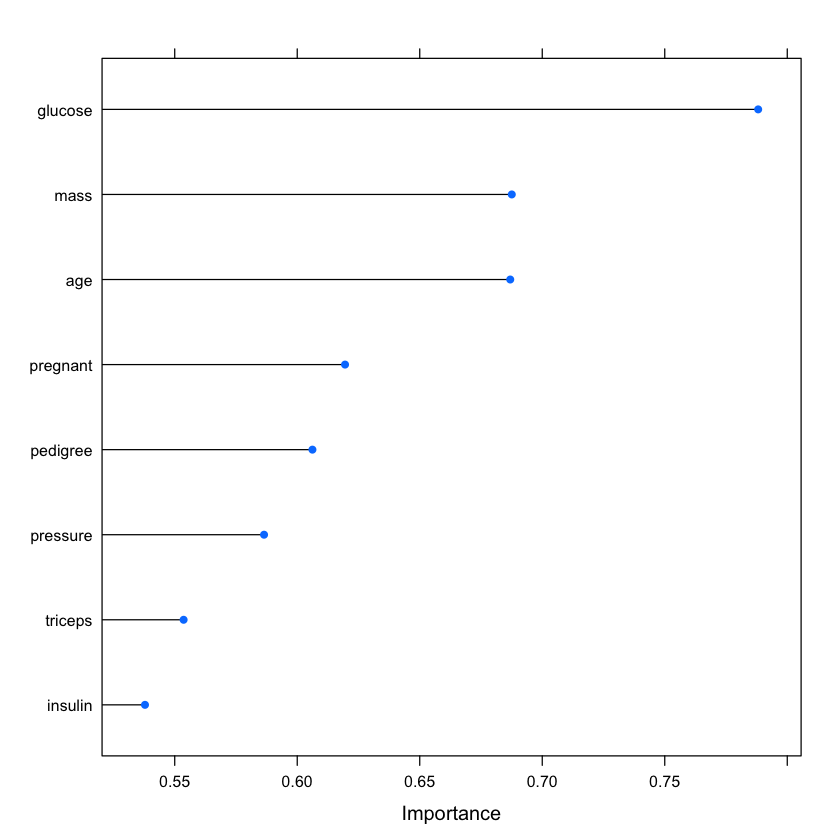

In [15]:
# Exibe um Gráfico de Seleção de Atributos ordenados
plot(importance)